<a href="https://colab.research.google.com/github/hwayoung306/AI/blob/main/20220503_ml_06_%EC%A7%80%EB%8F%84%ED%95%99%EC%8A%B5_GradientBoosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install mglearn

     |████████████████████████████████| 540 kB 6.8 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582639 sha256=28dda58613443a7b3bb892bc66be011d2f5f7edbe00f4fd435e9005791dd39f7
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


## Boosting 

- 여러 개의 분류기가 순차적으로 학습을 수행하되, 앞에서 학습한 분류기가 예측이 틀린 데이터에 대해서 올바르게 예측할 수 있도록 다음 분류기에게 가중치(weight)를 부여하면서 학습과 예측을 진행

- 분류기에 약한 학습기를 사용

- 약한 학습기 : 예측 성능이 상대적으로 떨어지는 학습 알고리즘, 결정트리가 좋은 예

# GradientBoosting 

- 여러 개의 결정 트리를 묶어 강력한 모델을 만드는 앙상블 방법

- 회귀와 분류 모두에 사용

- 랜덤 포레스트와는 달리 그래디언트 부스팅은 이전 트리의 오차를 보완하는 방식으로 순차적으로 트리를 만듬 (무작위성이 없음)

- 강력한 사전 가지치기가 사용

- 보통 다섯 개 이하 깊이의 트리를 사용하므로 메모리를 적게 사용하고 예측도 빠름

- 각각의 트리는 데이터의 일부에 대해서만 예측을 잘 수행할 수 있어서 트리가 많이 추가 될수록 성능이 좋아짐 -> 트리가 너무 많이지면 과적합 됨

- 랜덤 포레스트보다는 매개변수 설정에 조금 더 민감하지만 잘 조정하면 더 높은 정확도를 제공 -> 사전 처리가 필요함

-  learning_rate : 이전 트리의 오차를 얼마나 강하게 보정할 것인지를 제어 <br>
(가중치를 계산하는 방식에서 경사하강법를 이용하여 최적의 가중치(파라미터)를 찾아냄)

- 학습률이 크면 트리는 보정을 강하게 하기 때문에 복잡한 모델을 만듬

- n_estimators 값을 키우면 앙상블에 트리가 더 많이 추가되어 모델의 복잡도가 커지고 훈련 세트에서의 실수를 바로잡을 기회가 더 많아짐

## [GradientBoostingClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수 (트리가 많아질 수록 과대적합 가능성 증가)

- learning_rate : 오차를 보정하는 정도 (값이 높을 수록 오차를 많이 보정하려고 함 )

- max_depth : 트리의 최대 깊이 (일반적으로 트리의 깊이를 깊게 설정하지 않음)


#### GradientBoosting 실습 01

유방암 데이터 적용

In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

1.0 0.965034965034965


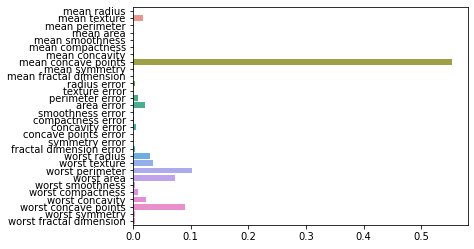

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습 n_estimators = 100 기본 / 
# model = GradientBoostingClassifier(random_state=0, n_estimators=50, max_depth=1)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# 평가
print ( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)
# 속성을 다양하게 사용하지는 않음 최적화인 대상을 사용할 뿐

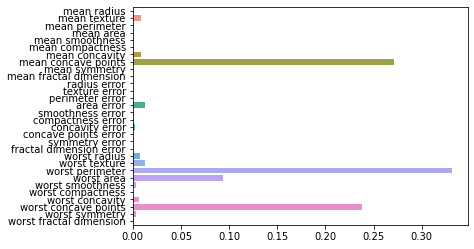

In [ ]:
model = GradientBoostingClassifier(random_state=0, n_estimators=50, max_depth=1)
model.fit(X_train, y_train)
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)


- 과대적합을 막기 위해서 트리의 최대 깊이를 줄여 사전 가지치기를 강하게 하거나 학습률을 낮출 수 있음

0.9906103286384976 0.972027972027972


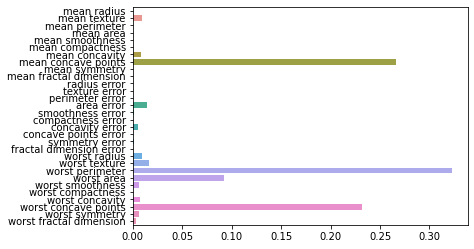

In [ ]:
# 트리의 최대 깊이를 줄여 사전 가지치기를 강하게한 경우
# 모델 학습
model = GradientBoostingClassifier(random_state=0, max_depth=1)
model.fit(X_train, y_train)

# 평가
print ( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

0.9882629107981221 0.965034965034965


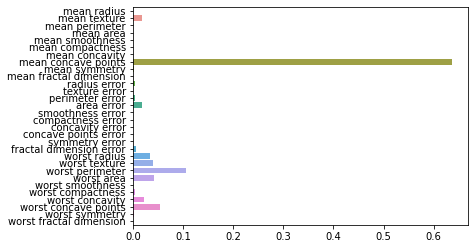

In [ ]:
# 학습률을 조정한 경우
model = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
model.fit(X_train, y_train)

# 평가
print ( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

- 두 방식은 모델의 복잡도를 감소시키므로 예상대로 훈련 세트의 정확도가 낮아짐
- 학습률을 낮추는 것은 테스트 세트의 성능을 조금밖에 개선하지 못했지만, 트리의 최대 깊이를 낮추는 것은 모델 성능 향상에 크게 기여

- 그래서 해볼 것 : 먼저 max_depth를 낮춰볼것

- 그래디언트 부스팅 트리의 특성 중요도 그래프가 랜덤 포레스트의 특성 중요도와 비슷하지만 그래디언트 부스팅은 일부 특성을 완전히 무시하고 있음

- 일반적으로 더 안정적인 랜덤 포레스트를 먼저 적용

- 예측 시간이 중요하거나 머신러닝 모델에서 마지막 성능까지 쥐어짜야 할 때 그래디언트 부스팅을 사용

- **대규모 머신러닝 문제**에 그래디언트 부스팅을 적용하려면 xgboost 패키지를 사용

## 장단점

장점
- 지도 학습에서 가장 강력하고 널리 사용하는 모델 중 하나

- 가장 큰 단점은 매개변수를 잘 조정해야 한다는 것과 훈련 시간이 길다는 것

- 다른 트리 기반 모델처럼 특성의 스케일을 조정하지 않아도 되고, 이진 특성이나 연속적인 특성에서도 잘 동작 -> 특성공학이 필요하진 않음

단점
- 트리 기반 모델의 특성상 희소한 고차원 데이터에는 잘 작동하지 않음

특징
- 중요 매개변수 : 트리의 개수를 지정하는 <font color=yellow>n_estimators</font>, 이전 트리의 오차를 보정하는 정도를 조절하는 <font color=yellow>learning_rate</font>

- 두 매개변수는 깊게 연관되며 learning_rate를 낮추면 비슷한 복잡도의 모델을 만들기 위해서 더 많은 트리를 추가해야 함

- n_estimators가 클수록 좋은 랜덤 포레스트와는 달리 그래디언트 부스팅에서 n_estimators를 크게 하면 모델이 복잡해지고 과대적합될 가능성이 높아짐

- 일반적인 관례는 가용한 시간과 메모리 한도에서 n_estimators를 맞추고 나서 적절한 learning_rate를 찾는 것

- 중요한 또 다른 매개변수는 각 트리의 복잡도를 낮추는 <font color=yellow>max_depth</font>(또는 <font color=yellow>max_leaf_nodes</font>)

- 일반적으로 그래디언트 부스팅 모델에서는 max_depth를 매우 작게 설정하며 트리의 깊이가 5보다 깊어지지 않게함

## [GradientBoostingRegressor()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html?highlight=gradientboostingregressor)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수 (트리가 많아질 수록 과대적합 가능성 증가)

- learning_rate : 오차를 보정하는 정도 (값이 높을 수록 오차를 많이 보정하려고 함 )

- max_depth : 트리의 최대 깊이 (일반적으로 트리의 깊이를 깊게 설정하지 않음)

- n_iter_no_change : 반복 횟수 동안 검증 점수가 개선되지 않을 때 조기 중지를 사용 (default=None)


#### GradientBoosting 실습 02

GradientBoosting 모델 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import mglearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE

(100, 1) (100,)


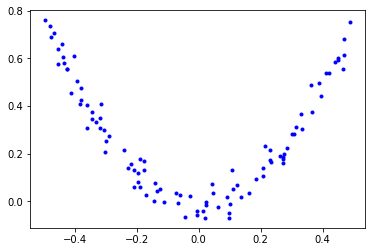

In [ ]:
# 잡음이 섞인 2차 곡선 형태 데이터
np.random.seed(42)
X = np.random.rand(100,1) - 0.5
y = 3 * X[:, 0]**2 + 0.05 * np.random.randn(100)
print( X.shape, y.shape )
plt.plot(X, y, 'b.')
plt.show()

부스팅 모델 만들기

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_1.fit(X, y)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# 첫 번째 모델에서 생긴 잔여오차에 두 번째 모델을 훈련
y2 = y - tree_1.predict(X)
tree_2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_2.fit(X, y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# 두 번째 모델에서 생긴 잔여오차에 세 번째 모델을 훈련
y3 = y2 - tree_2.predict(X)
tree_3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_3.fit(X, y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

In [ ]:
# 세 개의 트리를 포함하는 앙상블 모델
# 새로운 샘플에 대한 예측을 만드려면 모든 트리의 예측을 더함
X_new = np.array( [[0.8]] )
y_preds = [ tree.predict(X_new) for tree in (tree_1, tree_2, tree_3) ]
y_pred = sum(y_preds)

y_pred, y_preds

(array([0.75026781]),
 [array([0.52856846]), array([0.03991297]), array([0.18178637])])

시각화

In [ ]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=14)
    plt.axis(axes)

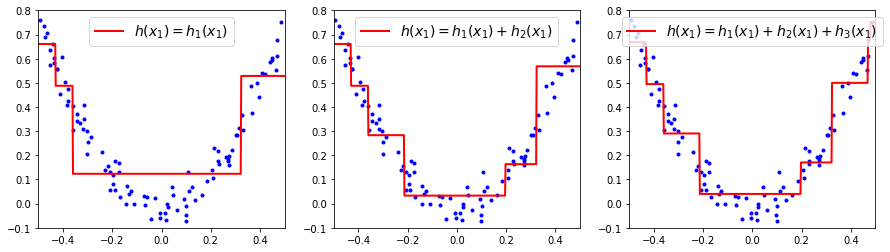

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

plt.sca(axes[0])                 # x축 범위   y축 범위
plot_predictions([tree_1], X, y, [-0.5, 0.5, -0.1, 0.8],
                 label = '$h(x_1)=h_1(x_1)$')

plt.sca(axes[1])                 
plot_predictions([tree_1, tree_2], X, y, [-0.5, 0.5, -0.1, 0.8],
                 label = '$h(x_1)=h_1(x_1)+h_2(x_1)$')

plt.sca(axes[2])                 
plot_predictions([tree_1, tree_2, tree_3], X, y, [-0.5, 0.5, -0.1, 0.8],
                 label = '$h(x_1)=h_1(x_1)+h_2(x_1)+h_3(x_1)$')

사이킷런 GradientBoosting

In [ ]:
# 트레인 테스트 분리하기
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.shape, y_train.shape

((75, 1), (75,))

In [ ]:
# GradientBoostingRegressor 사용
from sklearn.ensemble import GradientBoostingRegressor

# n_estimators 모델(예측기)이 부족한 경우
gbr_1 = GradientBoostingRegressor(max_depth=2, n_estimators=3,
                                  learning_rate=1.0, random_state=42)
gbr_1.fit(X_train, y_train)

# 점수, 점수, 오차율
gbr_1.score(X_train, y_train), gbr_1.score(X_test, y_test), gbr_1.predict(X_new) 

(0.926665148086729, 0.893288459289793, array([0.67888336]))

In [ ]:
# n_estimators 모델(예측기)이 너무 많은 경우
gbr_2 = GradientBoostingRegressor(max_depth=2, n_estimators=200,
                                  learning_rate=0.1, random_state=42)
gbr_2.fit(X_train, y_train)
gbr_2.score(X_train, y_train), gbr_2.score(X_test, y_test), gbr_2.predict(X_new)

(0.995106703743566, 0.9429596628871016, array([0.67366922]))

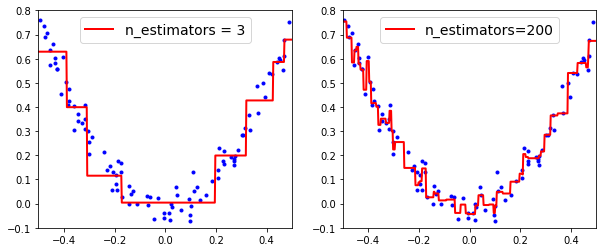

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(10,4) )

plt.sca( axes[0] )                 # x축 범위   y축 범위
plot_predictions([gbr_1], X, y, [-0.5, 0.5, -0.1, 0.8],
                 label = 'n_estimators = 3')

plt.sca( axes[1] )                 # x축 범위   y축 범위
plot_predictions([gbr_2], X, y, [-0.5, 0.5, -0.1, 0.8],
                 label = 'n_estimators=200')

손실 그래프

In [ ]:
# 초기 모델 확인
gbr_2.init_

DummyRegressor()

In [ ]:
len( gbr_2.estimators_)

200

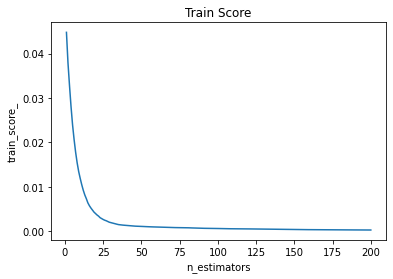

In [ ]:
# 손실 그래프
plt.plot( range(1,len(gbr_2.estimators_)+1 ), gbr_2.train_score_ )

plt.xlabel('n_estimators')
plt.ylabel('train_score_')
plt.title('Train Score')
plt.show()

In [ ]:
# 조기 종료 기법
gbr_3 = GradientBoostingRegressor(max_depth=2, n_estimators=200,
                                  n_iter_no_change=50,
                                  learning_rate=0.1, random_state=42)
gbr_3.fit(X_train, y_train)
len( gbr_3.estimators_ )

89

확률적 그레이디언트 부스팅

- subsample이 1보다 작을 때
- 확률이란 말은 모델에 무작위성이 주입된다는 뜻

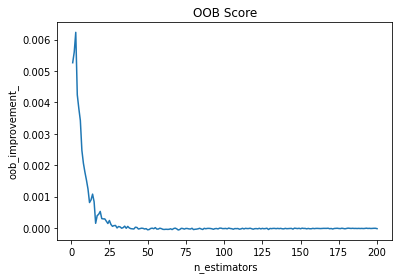

In [ ]:
gbr_4 = GradientBoostingRegressor(max_depth=2, n_estimators=200,
                                  subsample=0.5,
                                  learning_rate=0.1, random_state=42)
gbr_4.fit(X_train, y_train)

plt.plot( range(1,len(gbr_4.estimators_)+1 ), gbr_4.oob_improvement_)

plt.xlabel('n_estimators')
plt.ylabel('oob_improvement_')
plt.title('OOB Score')
plt.show()

# AdaBoost (Adaptive Boosting)

- GradientBoosting 처럼 약한 학습기를 사용
- 다른 점은 이전의 모델이 잘못 분류한 샘플에 가중치를 높여서 다음 모델을 훈련시킴 <br>
 (반복마다 샘플의 가중치를 수정, GBM은 이전 예측기가 만든 잔여 오차에 새로운 예측기를 학습)
- 훈련된 각 모델은 성능에 따라 가중치가 부여됨
- 예측을 만들 때는 모델이 예측된 레이블을 기준으로 모델의 가중치를 합산하여 가장 높은 값을 가진 레이블을 선택

- GradientBoosting와 마찬가지로 순차적으로 학습해야 하므로 n_jobs 매개변수는 지원하지 않음

[AdaBoostClassifier()](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)
```
AdaBoostClassifier(base_estimator=None, *, n_estimators=50, learning_rate=1.0, algorithm='SAMME.R', random_state=None)
```
- base_estimator : 앙상블이 구축되는 기본 추정기, 기본값으로 DecisionTreeClassifier(max_depth=1)를 사용
- <font color=yellow>n_estimators : 생성할 트리의 개수</font>
- <font color=yellow>learning_rate : 학습률</font>
- algorithm : 부스팅 알고리즘, 기본값='SAMME.R'
- random_state : 난수 seed 설정


#### AdaBoost 실습 01

two_moon 데이터 셋 적용

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

# 데이터 로드
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    stratify=y, 
                                                    random_state=42)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# 모델 학습
model = AdaBoostClassifier(n_estimators=5, random_state= 42)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9066666666666666, 0.8)

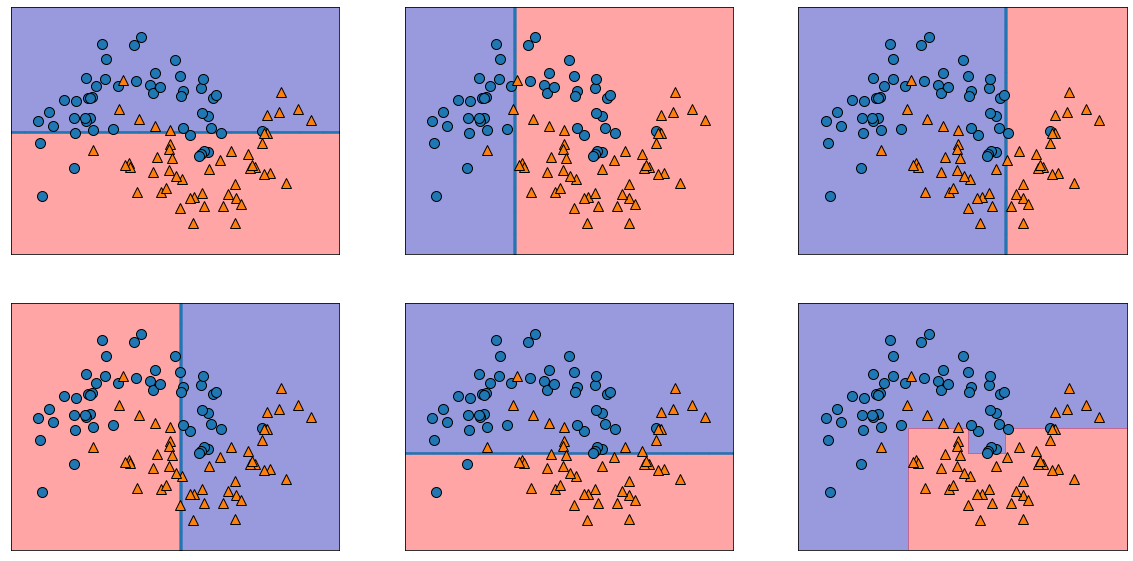

In [ ]:
import mglearn

# 결정 경계 시각화
fig, axes = plt.subplots(2,3,figsize =(20,10))

for tree, ax in zip(model.estimators_, axes.ravel()) :
    mglearn.plots.plot_tree_partition(X, y, tree, ax=ax)

# AdaBoost로 만들어진 결정경계
mglearn.plots.plot_2d_separator(model, X, fill=True, alpha=0.4, ax=axes[-1,-1])
mglearn.discrete_scatter(X[:,0], X[:,1], y)

- AdaBoostCalssifier는 깊이가 1인 결정트리를 사용하므로 각 트리의 결정 경계가 직선 하나 뿐임.
- 아주 얕은 트리를 앙상블

#### AdaBoost 실습 02

유방암 데이터를 이용

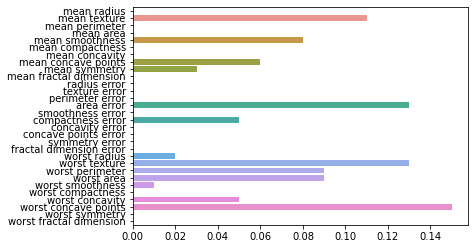

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)
# 모델 학습
model = AdaBoostClassifier(n_estimators=100, random_state= 42, learning_rate=0.07)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)


# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

# XGBoost (extreme gradient boosting)

- GBM을 개선하여 속도를 높인 것 (병렬 수행 및 다양한 기능으로)
- 일반적인 GBM에 비해 수행 시간이 빠른 것이지 다른 머신러닝 알고리즘에 비해서 빠르다는 의미는 아님 (랜덤 포레스트)


결손값(누락값)을 자체 처리할 수 있는 기능 지원

- missing 매개변수에 값을 지정
- 결손값이 있을 때 가능한 노드 불할마다 점수를 매겨서 최상의 결과를 내는 분할을 선택

속도 향상

- 근사 분할 탐색 알고리즘
 - 그리디(greedy) 알고리즘: 매단계에서 최상의 분할을 선택하고 이전 노드를 돌아보지 않음
 - 분할 탐색 알고리즘: 데이터를 나누는 퍼센트인 분위수(quantile)를 사용하여 후보 분할을 제안
 - 콴타일(quantile) 스케치 알고리즘은 가중치가 균일한 데이터셋에서 잘 동작
  - XGBoost는 이론적으로 보장된 병합과 가지치기를 기반으로 한 새로운 가중 콴타일 스케치를 사용 https://arxiv.org/pdf/1603.02754.pdf

- 희소성 고려 분할 탐색
 - 대부분의 원소가 0이거나 널(null)인 데이터
 - 데이터셋이 주로 누락된 값으로 구성되거나 원-핫 인코딩 되어 있는 경우
 - 희소 행렬 : 0이 아니거나 널이 아닌 데이터 포인트만 저장하여 공간을 절약

- 병렬 컴퓨팅
 - XGBoost는 데이터 블록이란 단위로 정렬하고 압축
 - 블록 단위로 여러 머신이나 외부 메모리에 분산 가능

- 캐시 고려 접근
 - XGBoost는 캐시를 고려한 프리페칭(prefetching)을 사용
 - 내부 버퍼를 할당하고 그레이디언트 통계를 가져와 미니배치 방식으로 누적을 수행
 - 프리페칭은 일기/쓰기 의존성을 느슨하게 만들고 많은 샘플을 가진 데이터셋에서 실행 부하를 절반으로 절감

- 블록 압축과 블록 샤딩(sharding)
 - 블록 압축은 열을 압축하여 계산 비용이 많이 드는 디스크 읽기에 도움
 - 블록 샤딩은 번갈아 가며 여러 디스크로 데이터를 샤딩하기 때문에 데이터를 읽는 시간을 감소

정확도 향상

- 자체적으로 규제를 추가
- 규제(regularization) : 분산을 줄이고 과대적합을 방지하기 위한 방법

[XGBClassifier()](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수, 지정된 횟수만큼 반복적으로 학습 오류를 감소시며 학습을 진행(조기중단 미지원)
- learning_rate : 오차를 보정하는 정도
- max_depth : 트리의 최대 깊이

- subsample : 데이터 샘플링 비율을 지정, 보통 0.5~1 사이의 값을 사용 <br>
 트리가 커져서 과적합되는 것을 제어하기 위함
- reg_alpha : L1 regularization 적용값
- reg_lambda : L2 regularization 적용값
- n_jobs : xgboost를 실행하는 데 사용되는 병렬 스레드 수

In [ ]:
import xgboost
xgboost.__version__

'0.90'

#### XGBoost 실습 01

유방암 데이터를 이용

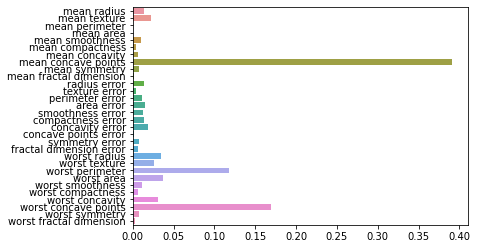

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.datasets import load_breast_cancer
import pandas as pd

# 데이터 로드
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
df['label'] = cancer.target
df.head()

X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 모델 학습
model = XGBClassifier(random_state=42, max_depth=3, n_estimators=500, learning_rate=0.01)
model.fit(X_train, y_train)

# 평가
model.score(X_train, y_train), model.score(X_test, y_test)

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

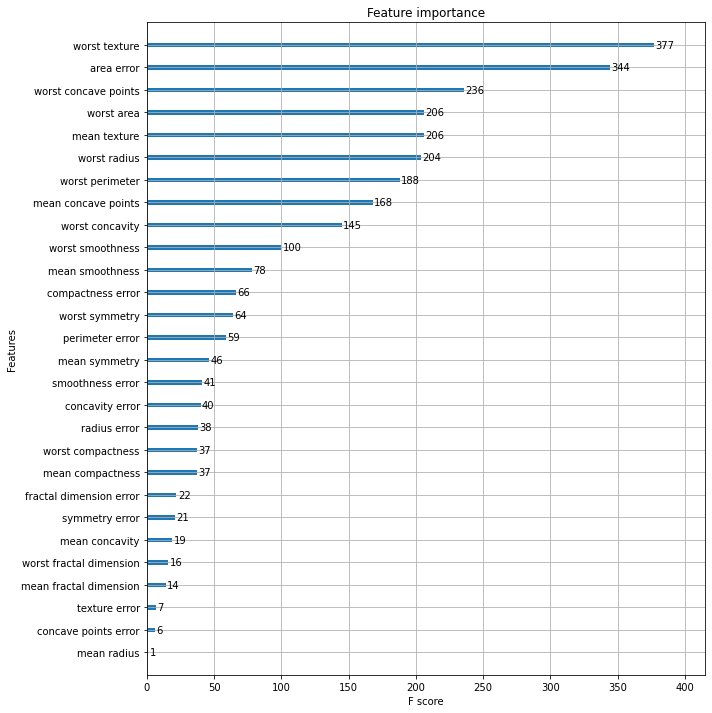

In [ ]:
# plot_importance() 이용
import matplotlib.pyplot as plt
from xgboost import plot_importance

fig, axes = plt.subplots(figsize=(10, 12))
plot_importance(model, ax=axes)

In [ ]:
# 모델 학습 (조기중단을 수행)
model = XGBClassifier(random_state=42, max_depth=3, n_estimators=1000,
                      learning_rate=0.1)

evals = [ (X_test, y_test) ]
model.fit(X_train, y_train, 
          eval_set = evals,             # 성능평가를 수행할 데이터셋 (검증)
          eval_metric='logloss',        # 조기 중단을 위한 평가지표
          early_stopping_rounds=50)     # 평가 지표가 향상될 수 있는 반복 횟수

1.0 0.9790209790209791


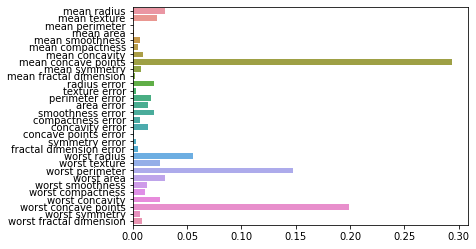

In [ ]:
# 평가
print( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

- 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 있음

속도 비교 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
import time

start = time.time()

gbr = GradientBoostingRegressor(n_estimators=400, max_depth = 3,
                                learning_rate=0.01,
                                random_state=42).fit(X_train, y_train)

print( gbr.score(X_train, y_train), gbr_1 )

end = time.time()
elapsed = end - start
print( '실행시간 : ', str(elapsed),'초' )

0.983560988000794 GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)
실행시간 :  2.2216804027557373 초


In [ ]:
start = time.time()

gbr =XGBClassifier(n_estimators=400, max_depth = 3,
                                learning_rate=0.01,
                                random_state=42).fit(X_train, y_train)

print( gbr.score(X_train, y_train), gbr_1 )

end = time.time()
elapsed = end - start
print( '실행시간 : ', str(elapsed),'초' )

0.9976525821596244 GradientBoostingRegressor(learning_rate=1.0, max_depth=2, n_estimators=3,
                          random_state=42)
실행시간 :  0.7036888599395752 초


#### XGBoot 실습 02 (회귀)
당뇨병 데이터를 이용

In [ ]:
from sklearn.datasets import load_diabetes

diabetes = load_diabetes()
diabetes.keys()
print( diabetes.DESCR )

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [ ]:
X, y = load_diabetes(return_X_y=True)
X.shape, y.shape

((442, 10), (442,))

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score

xgb = XGBRegressor(booster='gbtree', sbjective = 'regisquarederror',
                   max_depth=6, learning_rate=0.1, n_estimators=100, n_jobs =1)


In [ ]:
# 교차검증
scores = cross_val_score(xgb, X, y, scoring='neg_mean_squared_error', cv=5)
scores

[08:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:45:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


array([-3973.1898775 , -3562.83515219, -4165.08995057, -4057.56078087,
       -4181.04193062])

In [ ]:
rmse = np.sqrt(-scores)
print('RMSE : ', np.round(rmse, 3))
print(f'RMSE 평균 : {rmse.mean():0.3f}')

RMSE :  [63.033 59.689 64.538 63.699 64.661]
RMSE 평균 : 63.124


In [ ]:
# 결과 비교
# 당뇨병 데이터셋의 타깃 데이터 통계와 비교(std)
pd.DataFrame(y).describe()

,0
count,442.000000
mean,152.133484
std,77.093005
min,25.000000
25%,87.000000
50%,140.500000
75%,211.500000
max,346.000000


# LightGBM

- XGBoost 보다 학습에 걸리는 시간이 훨씬 적음
- 메모리 사용량도 상대적으로 적음
- XGBoost와 비교하여 예측 성능에 별다른 차이가 없음
- 적은 데이터 세트에 적용할 경우 과적합 발생이 쉬움 <br>
 (일반적으로 10,000 건 이하의 데이터 세트로 공식문서에 기술)
- 균형 트리분할(Level Wise) 방식이 아닌 리프중심 트리분할(Leaf Wise) 방식을 사용


<center>
 <img src="https://blog.kakaocdn.net/dn/UI31I/btqCpRmVipf/dZOeXysFGspk2ukY7tGJb0/img.jpg" alt="트리분할" width="60%" />

</center>

균형 트리분할(Level Wise)

- 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리분할(Level Wise) 방식을 사용
- 균형 잡힌 트리는 오버피팅에 보다 더 강한 구조를 가질 수 있다고 알려져 있기 때문
- 균형을 맞추기 위한 시간이 추가로 필요

리프중심 트리분할(Leaf Wise)

- 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는 리프 노드를 지속적으로 분할
- 트리의 깊이가 깊어지고 비대칭적인 규칙 트리를 생성
- 학습을 반복할 수록 균형트리분할 방식보다 예측 오류 손실을 최소화 할 수 있음

[LGBMClassifier()](https://lightgbm.readthedocs.io/en/latest/pythonapi/lightgbm.LGBMClassifier.html)

주요 매개변수(Hyperparameter)

- n_estimators  : 생성할 트리의 개수, 지정된 횟수만큼 반복적으로 학습 오류를 감소시며 학습을 진행(조기중단 미지원)
- learning_rate : 오차를 보정하는 정도
- max_depth : 트리의 최대 깊이

- subsample : 데이터 샘플링 비율을 지정, 보통 0.5~1 사이의 값을 사용 <br>
 트리가 커져서 과적합되는 것을 제어하기 위함
- reg_alpha : L1 regularization 적용값
- reg_lambda : L2 regularization 적용값
- n_jobs : xgboost를 실행하는 데 사용되는 병렬 스레드 수

- **num_leaves : 개별 트리가 가질 수 있는 최대 리프의 수 <br>
(높이면 정확도가 높아지지만, 반대로 트리의 깊이가 깊어지고 모델 복잡도가 증가, 과대적합 가능성 증가)**
- **min_child_samples : 결정 트리의 min_samples_leaf와 같은 파라미터**

#### LightGBM 설치하기

- 32bit python 에서는 설치되지 않음. 64bit Python 혹은 Anaconda 환경에서 설치

[Conda 이용하기](https://anaconda.org/conda-forge/lightgbm)


Anaconda Prompt (Anaconda3) 관리자 권한으로 실행
```
conda install -c conda-forge lightgbm
```

In [ ]:
import lightgbm
lightgbm.__version__

'2.2.3'

#### LightGBM 실습 01

유방암 데이터를 이용

In [ ]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_breast_cancer

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습 n_estimators = 100 기본 / 
# model = GradientBoostingClassifier(random_state=0, n_estimators=50, max_depth=1)
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# 평가
print ( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)
# 속성을 다양하게 사용하지는 않음 최적화인 대상을 사용할 뿐

0.9906103286384976 0.9790209790209791


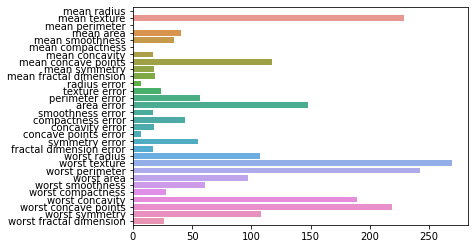

In [ ]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMClassifier
from sklearn.datasets import load_breast_cancer
import seaborn as sns

# 데이터 로드
cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    random_state=0)

# 모델 학습 n_estimators = 100 기본 / 
# model = GradientBoostingClassifier(random_state=0, n_estimators=50, max_depth=1)
model = LGBMClassifier(random_state=42, n_estimators=400,
                       max_depth=3, learning_rate=0.01)
model.fit(X_train, y_train)

# 평가
print ( model.score(X_train, y_train), model.score(X_test, y_test) )

# 특성 중요도 시각화
sns.barplot(x=model.feature_importances_, y=cancer.feature_names)

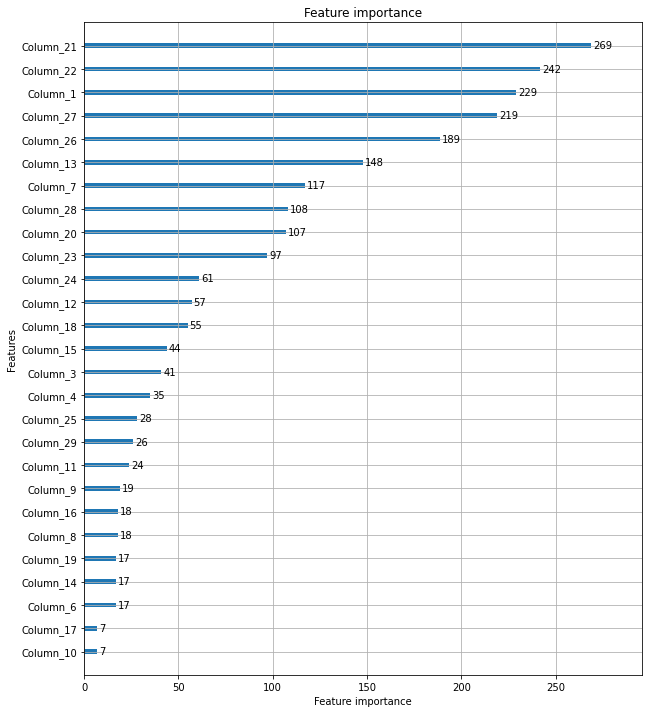

In [ ]:
# plot_importance() 이용
from lightgbm import plot_importance
import matplotlib.pyplot as plt

fig, axes = plt.subplots( figsize = (10,12))
plot_importance(model, ax= axes)

#### Tip

NGBoost (Natural Gradient Boost)

 - 앤드류 응 교수가 속해있는 스탠퍼드 ML Group에서 최근 발표한 부스팅 알고리즘 (2019년 10월 9일에 발표)

 - 장단점

  - NGBoost는 XGBoost나 LightBoost보다 성능이 조금 더 좋음
  - 확률적인 예측을 해줌 (예측의 불확실성을 측정)
  - XGBoost, LightGBM보다 컴퓨팅 시간이 오래 걸림

CatBoost
- 범주형 특성을 잘 처리

# 머신러닝 알고리즘 정리

- 나이브 베이즈(Naive Bayes) : 베이즈(Bayes) 통계와 생성 모델에 기반

- 로지스틱 회귀(Logistic Regression) : 독립변수와 종속변수의 선형 관계성에 기반

- 결정 트리(Decision Tree) : 데이터 균일도에 따른 규칙 기반

- 서포트 벡터 머신(Suppert Vector Machine) : 개별 클래스 간의 최대 분류 마진을 효과적으로 찾아줌

- 최소 근접(Nearest Neighbor) 알고리즘 : 근접 거리를 기준

- 앙상블(Ensemble) : 서로 다른(또는 같은) 머신러닝 알고리즘을 결합

- 신경망(Neural Network) : 심층 연결 기반

## Stacking 

- 스태킹은 두 개의 수준으로 머신러닝 모델을 결합

 - 기본수준: 모델이 모든 데이터를 사용하여 예측을 만듦
 - 메타수준: 베이스 모델의 예측을 입력으로 받아 최종 예측을 만듦 (블랜더 blender 또는 메타학습기 meta learnner)

- 스태킹은 최종적으로 예측을 결합하는 메타 모델로 인해 기본적인 앙상블과 구별
- 메타모델은 예측을 입력으로 받기 때문에 회귀에서는 선형 회귀, 분류에서는 로지스택 회귀 같은 간단한 모델 사용을 권장


In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target


base_models = []
base_models.append( ('lr', LogisticRegression()) )
base_models.append( ('xgb', XGBClassifier()) )
base_models.append( ('rf', RandomForestClassifier(random_state=0)) )

meta_model = LogisticRegression()

model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

kfold = StratifiedKFold(n_splits=5)
scores = cross_val_score(model, X, y, cv=kfold)
scores, scores.mean()